실습 2: KL Divergence 계산 및 시각화

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from scipy.special import kl_div
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정 (선택사항)
plt.rcParams['font.family'] = ['DejaVu Sans']
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# 시드 설정
np.random.seed(42)

2.1 이산분포에서의 KL Divergence

=== Bernoulli Distribution KL Divergences ===
KL(Bern(0.1)||Bern(0.1)) = 0.0000
KL(Bern(0.1)||Bern(0.3)) = 0.1163
KL(Bern(0.1)||Bern(0.5)) = 0.3681
KL(Bern(0.1)||Bern(0.7)) = 0.7942
KL(Bern(0.1)||Bern(0.9)) = 1.7578
KL(Bern(0.3)||Bern(0.1)) = 0.1537
KL(Bern(0.3)||Bern(0.3)) = 0.0000
KL(Bern(0.3)||Bern(0.5)) = 0.0823
KL(Bern(0.3)||Bern(0.7)) = 0.3389
KL(Bern(0.3)||Bern(0.9)) = 1.0326
KL(Bern(0.5)||Bern(0.1)) = 0.5108
KL(Bern(0.5)||Bern(0.3)) = 0.0872
KL(Bern(0.5)||Bern(0.5)) = 0.0000
KL(Bern(0.5)||Bern(0.7)) = 0.0872
KL(Bern(0.5)||Bern(0.9)) = 0.5108
KL(Bern(0.7)||Bern(0.1)) = 1.0326
KL(Bern(0.7)||Bern(0.3)) = 0.3389
KL(Bern(0.7)||Bern(0.5)) = 0.0823
KL(Bern(0.7)||Bern(0.7)) = 0.0000
KL(Bern(0.7)||Bern(0.9)) = 0.1537
KL(Bern(0.9)||Bern(0.1)) = 1.7578
KL(Bern(0.9)||Bern(0.3)) = 0.7942
KL(Bern(0.9)||Bern(0.5)) = 0.3681
KL(Bern(0.9)||Bern(0.7)) = 0.1163
KL(Bern(0.9)||Bern(0.9)) = 0.0000

=== Categorical Distribution KL Divergences ===
KL(Uniform||Uniform) = 0.0000
KL(Uniform||Peaked) = 0.5

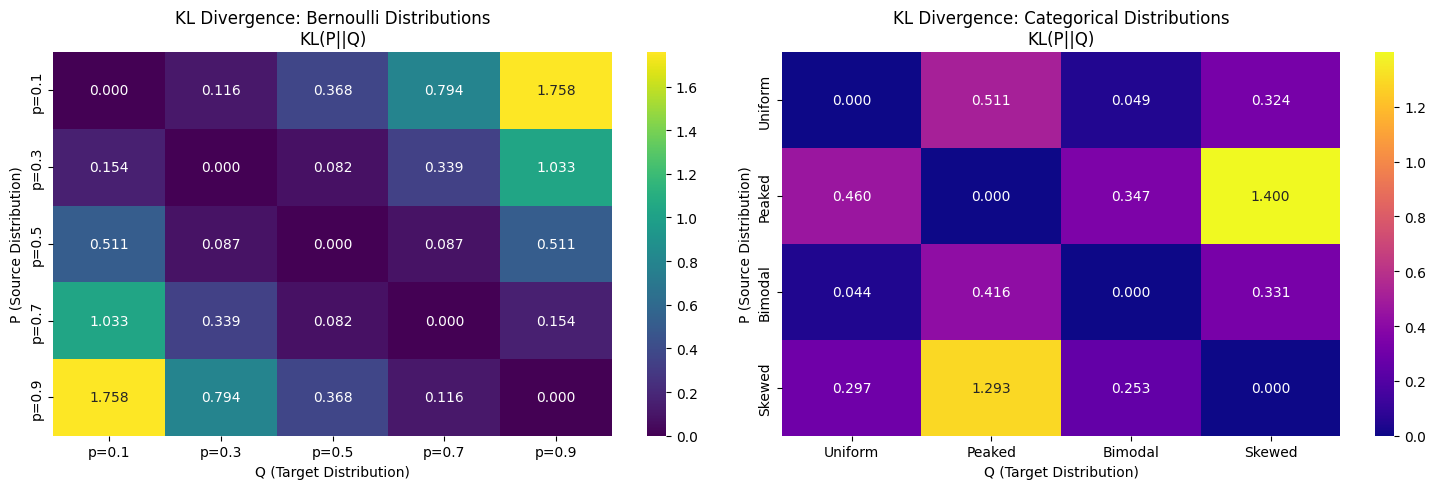

In [2]:
def calculate_discrete_kl():
    """이산분포들 간의 KL Divergence 계산"""
    
    def kl_divergence_discrete(p, q, epsilon=1e-10):
        """이산분포의 KL Divergence 계산"""
        # 0으로 나누기 방지
        q = np.maximum(q, epsilon)
        p = np.maximum(p, epsilon)
        
        # KL(P||Q) = Σ P(x) * log(P(x)/Q(x))
        return np.sum(p * np.log(p / q))
    
    # 예시 1: 베르누이 분포들
    print("=== Bernoulli Distribution KL Divergences ===")
    p_values = [0.1, 0.3, 0.5, 0.7, 0.9]
    
    results = []
    for p1 in p_values:
        row = []
        for p2 in p_values:
            # P = Bernoulli(p1), Q = Bernoulli(p2)
            P = np.array([1-p1, p1])
            Q = np.array([1-p2, p2])
            kl = kl_divergence_discrete(P, Q)
            row.append(kl)
            print(f"KL(Bern({p1})||Bern({p2})) = {kl:.4f}")
        results.append(row)
    
    # 히트맵으로 시각화
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    sns.heatmap(results, annot=True, fmt='.3f', 
                xticklabels=[f'p={p}' for p in p_values],
                yticklabels=[f'p={p}' for p in p_values],
                cmap='viridis')
    plt.title('KL Divergence: Bernoulli Distributions\nKL(P||Q)')
    plt.xlabel('Q (Target Distribution)')
    plt.ylabel('P (Source Distribution)')
    
    # 예시 2: 카테고리컬 분포
    print("\n=== Categorical Distribution KL Divergences ===")
    
    # 3개 클래스 분포들
    distributions = {
        'Uniform': np.array([1/3, 1/3, 1/3]),
        'Peaked': np.array([0.8, 0.1, 0.1]),
        'Bimodal': np.array([0.4, 0.2, 0.4]),
        'Skewed': np.array([0.1, 0.2, 0.7])
    }
    
    names = list(distributions.keys())
    kl_matrix = np.zeros((len(names), len(names)))
    
    for i, name1 in enumerate(names):
        for j, name2 in enumerate(names):
            kl = kl_divergence_discrete(distributions[name1], distributions[name2])
            kl_matrix[i, j] = kl
            print(f"KL({name1}||{name2}) = {kl:.4f}")
    
    plt.subplot(1, 2, 2)
    sns.heatmap(kl_matrix, annot=True, fmt='.3f',
                xticklabels=names, yticklabels=names,
                cmap='plasma')
    plt.title('KL Divergence: Categorical Distributions\nKL(P||Q)')
    plt.xlabel('Q (Target Distribution)')
    plt.ylabel('P (Source Distribution)')
    
    plt.tight_layout()
    plt.show()
    
    return results, kl_matrix

# 실행
discrete_results, categorical_matrix = calculate_discrete_kl()

2.2 연속분포에서의 KL Divergence

=== Normal Distribution KL Divergences ===
Distribution Pair    Analytical   Numerical    Difference  
------------------------------------------------------------
N(0,1) vs N(0,1)     0.000000     0.000000     0.000000    
N(0,1) vs N(1,1)     0.500000     0.499852     0.000148    
N(0,1) vs N(0,2)     0.318147     0.318147     0.000000    
N(0,1) vs N(2,0.5)   8.806853     8.222487     0.584366    
N(1,2) vs N(-1,1)    2.806853     2.756557     0.050295    


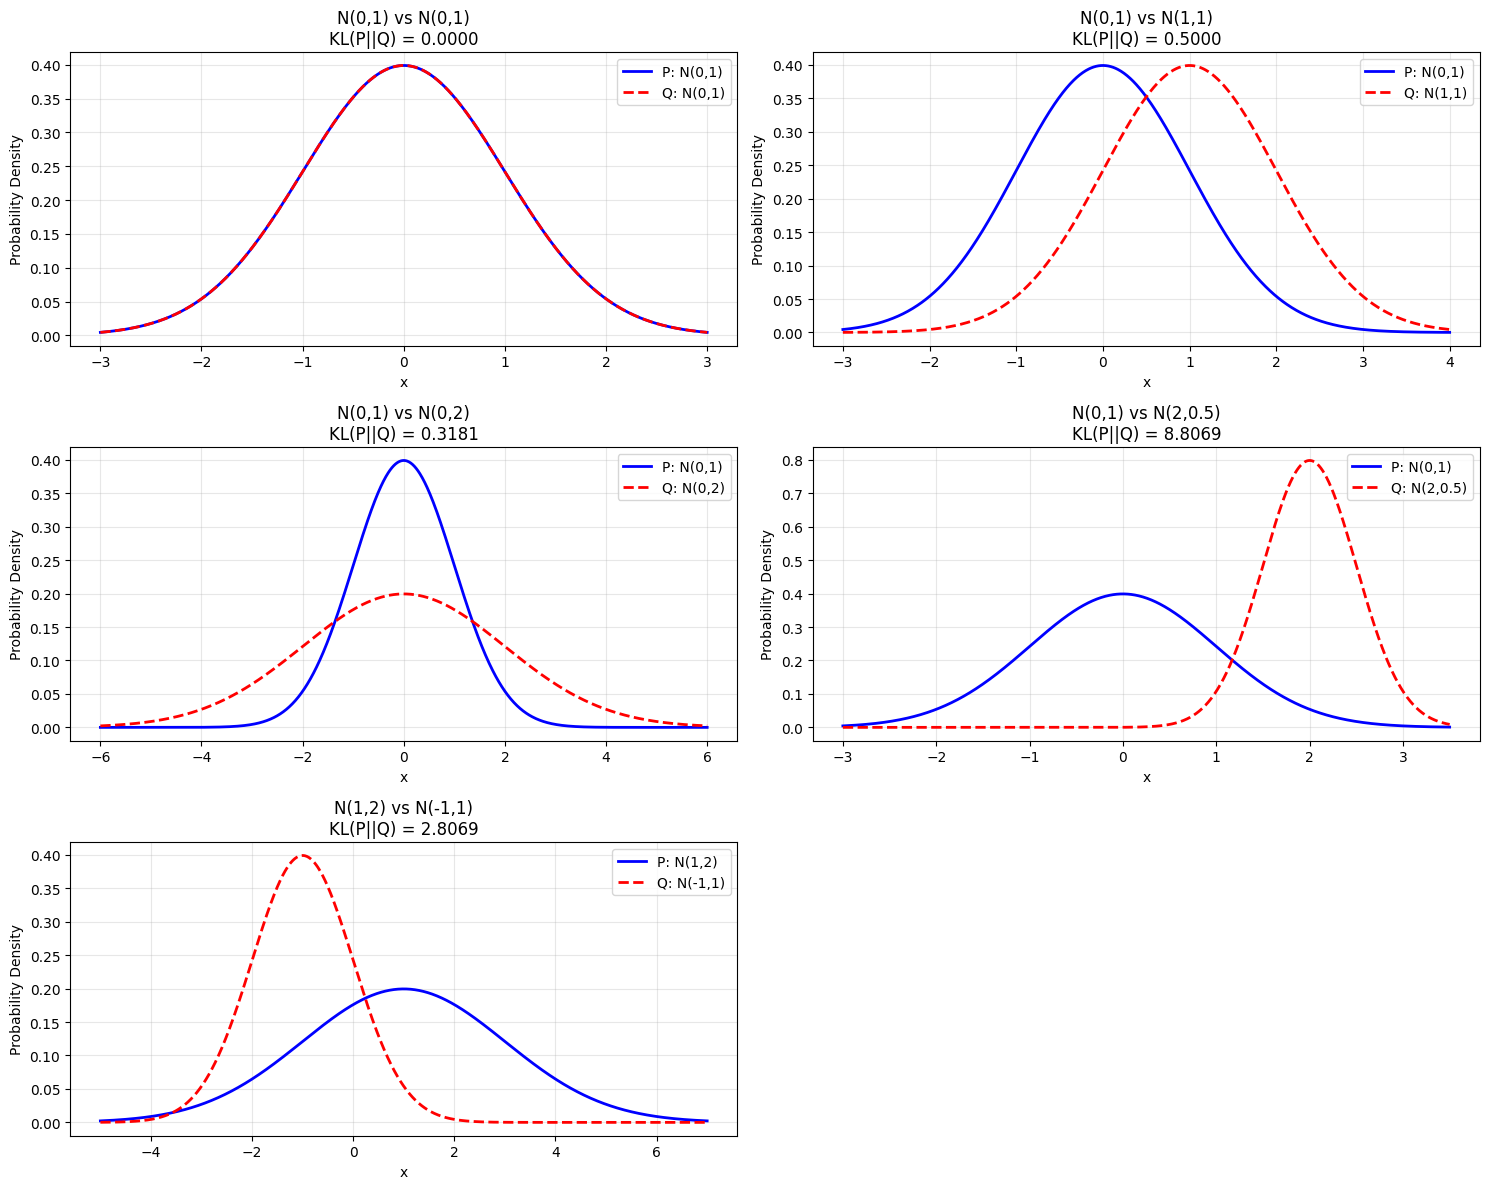

In [3]:
def calculate_continuous_kl():
    """연속분포들 간의 KL Divergence 계산"""
    
    def kl_normal_analytical(mu1, sigma1, mu2, sigma2):
        """정규분포 간 KL Divergence 해석적 계산"""
        # KL(N(μ1,σ1²)||N(μ2,σ2²))
        return np.log(sigma2/sigma1) + (sigma1**2 + (mu1-mu2)**2)/(2*sigma2**2) - 0.5
    
    def kl_normal_numerical(mu1, sigma1, mu2, sigma2, n_points=10000):
        """정규분포 간 KL Divergence 수치적 계산"""
        # 샘플링 범위 설정
        x_min = min(mu1 - 4*sigma1, mu2 - 4*sigma2)
        x_max = max(mu1 + 4*sigma1, mu2 + 4*sigma2)
        x = np.linspace(x_min, x_max, n_points)
        dx = x[1] - x[0]
        
        # PDF 계산
        p = stats.norm.pdf(x, mu1, sigma1)
        q = stats.norm.pdf(x, mu2, sigma2)
        
        # 0으로 나누기 방지
        q = np.maximum(q, 1e-10)
        p = np.maximum(p, 1e-10)
        
        # 수치적 적분
        integrand = p * np.log(p / q)
        kl = np.trapz(integrand, dx=dx)
        
        return kl
    
    # 다양한 정규분포 쌍들
    distributions = [
        {'name': 'N(0,1) vs N(0,1)', 'mu1': 0, 'sigma1': 1, 'mu2': 0, 'sigma2': 1},
        {'name': 'N(0,1) vs N(1,1)', 'mu1': 0, 'sigma1': 1, 'mu2': 1, 'sigma2': 1},
        {'name': 'N(0,1) vs N(0,2)', 'mu1': 0, 'sigma1': 1, 'mu2': 0, 'sigma2': 2},
        {'name': 'N(0,1) vs N(2,0.5)', 'mu1': 0, 'sigma1': 1, 'mu2': 2, 'sigma2': 0.5},
        {'name': 'N(1,2) vs N(-1,1)', 'mu1': 1, 'sigma1': 2, 'mu2': -1, 'sigma2': 1},
    ]
    
    print("=== Normal Distribution KL Divergences ===")
    print(f"{'Distribution Pair':<20} {'Analytical':<12} {'Numerical':<12} {'Difference':<12}")
    print("-" * 60)
    
    plt.figure(figsize=(15, 12))
    
    for i, dist in enumerate(distributions):
        # KL 계산
        kl_analytical = kl_normal_analytical(dist['mu1'], dist['sigma1'], 
                                           dist['mu2'], dist['sigma2'])
        kl_numerical = kl_normal_numerical(dist['mu1'], dist['sigma1'], 
                                         dist['mu2'], dist['sigma2'])
        difference = abs(kl_analytical - kl_numerical)
        
        print(f"{dist['name']:<20} {kl_analytical:<12.6f} {kl_numerical:<12.6f} {difference:<12.6f}")
        
        # 시각화
        plt.subplot(3, 2, i+1)
        
        # x 범위 설정
        x_min = min(dist['mu1'] - 3*dist['sigma1'], dist['mu2'] - 3*dist['sigma2'])
        x_max = max(dist['mu1'] + 3*dist['sigma1'], dist['mu2'] + 3*dist['sigma2'])
        x = np.linspace(x_min, x_max, 1000)
        
        # PDF 계산
        p = stats.norm.pdf(x, dist['mu1'], dist['sigma1'])
        q = stats.norm.pdf(x, dist['mu2'], dist['sigma2'])
        
        # 그래프 그리기
        plt.plot(x, p, 'b-', linewidth=2, 
                label=f"P: N({dist['mu1']},{dist['sigma1']})")
        plt.plot(x, q, 'r--', linewidth=2, 
                label=f"Q: N({dist['mu2']},{dist['sigma2']})")
        
        plt.title(f"{dist['name']}\nKL(P||Q) = {kl_analytical:.4f}")
        plt.xlabel('x')
        plt.ylabel('Probability Density')
        plt.legend()
        plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# 실행
calculate_continuous_kl()

2.3 KL Divergence의 성질 확인

=== KL Divergence Properties Verification ===

1. Non-negativity: KL(P||Q) ≥ 0
  Trial 1: KL = 1.324544 ✓
  Trial 2: KL = 1.150986 ✓
  Trial 3: KL = 0.447454 ✓
  Trial 4: KL = 1.462547 ✓
  Trial 5: KL = 0.590351 ✓
  Trial 6: KL = 0.454201 ✓
  Trial 7: KL = 0.755375 ✓
  Trial 8: KL = 0.791476 ✓
  Trial 9: KL = 1.450255 ✓
  Trial 10: KL = 1.560943 ✓

2. Identity: KL(P||P) = 0
  Distribution 1: KL = -0.0000000000
  Distribution 2: KL = -0.0000000000
  Distribution 3: KL = -0.0000000000

3. Asymmetry: KL(P||Q) ≠ KL(Q||P)
  Pair 1: KL(P||Q) = 0.5341, KL(Q||P) = 0.5827
           Difference = 0.0486
  Pair 2: KL(P||Q) = 1.7578, KL(Q||P) = 1.7578
           Difference = 0.0000
  Pair 3: KL(P||Q) = 0.0811, KL(Q||P) = 0.0811
           Difference = 0.0000

4. Relation to Jensen's Inequality
   KL(P||Q) = E_P[log(P/Q)] ≥ log(E_P[P/Q]) - log(1) = 0


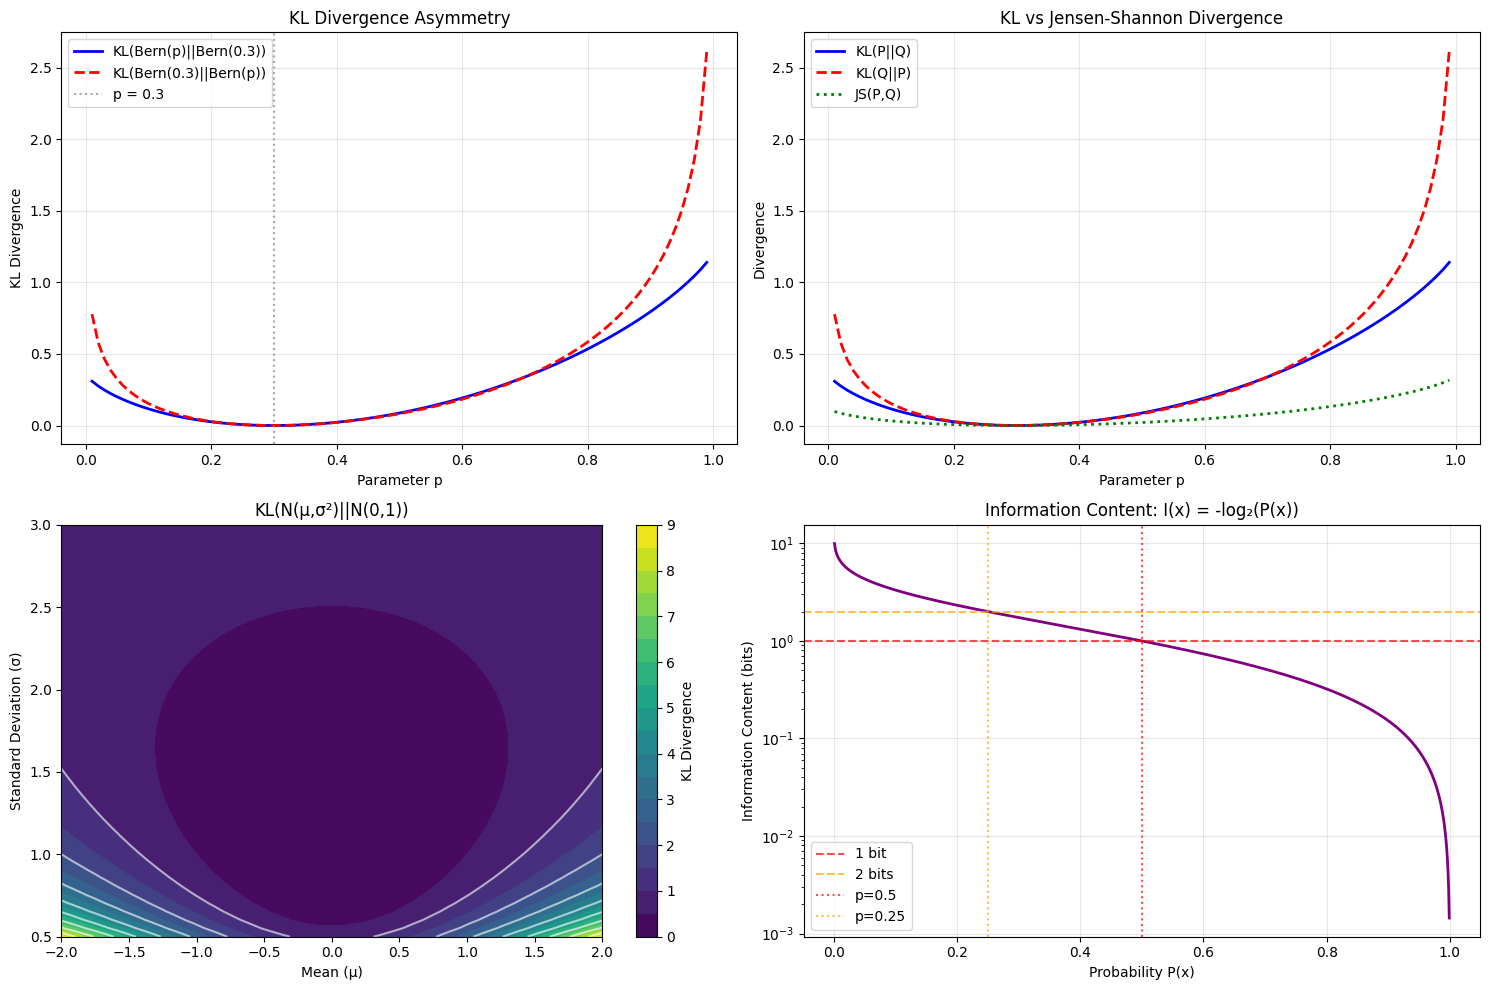

In [5]:
def verify_kl_properties():
    """KL Divergence의 수학적 성질들을 실험적으로 확인"""
    
    print("=== KL Divergence Properties Verification ===\n")
    
    # 1. 비음성 (Non-negativity)
    print("1. Non-negativity: KL(P||Q) ≥ 0")
    
    np.random.seed(42)
    for i in range(10):
        # 랜덤 확률분포 생성
        p = np.random.dirichlet([1, 1, 1, 1])  # 4차원 심플렉스에서 샘플
        q = np.random.dirichlet([1, 1, 1, 1])
        
        kl = np.sum(p * np.log(p / (q + 1e-10)))
        print(f"  Trial {i+1}: KL = {kl:.6f} {'✓' if kl >= 0 else '✗'}")
    
    # 2. 동일 분포에서 0
    print("\n2. Identity: KL(P||P) = 0")
    
    test_distributions = [
        [0.25, 0.25, 0.25, 0.25],  # Uniform
        [0.7, 0.2, 0.05, 0.05],    # Peaked
        [0.1, 0.4, 0.4, 0.1],      # Bimodal
    ]
    
    for i, p in enumerate(test_distributions):
        p = np.array(p)
        kl = np.sum(p * np.log(p / p))  # 이론적으로 0 (실제로는 NaN 방지 필요)
        kl_safe = np.sum(p * np.log(p / (p + 1e-15)))
        print(f"  Distribution {i+1}: KL = {kl_safe:.10f}")
    
    # 3. 비대칭성 (Asymmetry)
    print("\n3. Asymmetry: KL(P||Q) ≠ KL(Q||P)")
    
    test_pairs = [
        ([0.8, 0.2], [0.3, 0.7]),
        ([0.9, 0.1], [0.1, 0.9]),
        ([0.6, 0.4], [0.4, 0.6]),
    ]
    
    for i, (p, q) in enumerate(test_pairs):
        p, q = np.array(p), np.array(q)
        kl_pq = np.sum(p * np.log(p / q))
        kl_qp = np.sum(q * np.log(q / p))
        
        print(f"  Pair {i+1}: KL(P||Q) = {kl_pq:.4f}, KL(Q||P) = {kl_qp:.4f}")
        print(f"           Difference = {abs(kl_pq - kl_qp):.4f}")
    
    # 4. Jensen's Inequality와의 관계
    print("\n4. Relation to Jensen's Inequality")
    print("   KL(P||Q) = E_P[log(P/Q)] ≥ log(E_P[P/Q]) - log(1) = 0")
    
    # 시각화
    plt.figure(figsize=(15, 10))
    
    # 4.1 비대칭성 시각화
    plt.subplot(2, 2, 1)
    
    p_range = np.linspace(0.01, 0.99, 100)
    q_fixed = 0.3
    
    kl_pq = []
    kl_qp = []
    
    for p in p_range:
        # 베르누이 분포
        P = np.array([1-p, p])
        Q = np.array([1-q_fixed, q_fixed])
        
        kl1 = np.sum(P * np.log(P / Q))
        kl2 = np.sum(Q * np.log(Q / P))
        
        kl_pq.append(kl1)
        kl_qp.append(kl2)
    
    plt.plot(p_range, kl_pq, 'b-', linewidth=2, label=f'KL(Bern(p)||Bern({q_fixed}))')
    plt.plot(p_range, kl_qp, 'r--', linewidth=2, label=f'KL(Bern({q_fixed})||Bern(p))')
    plt.axvline(x=q_fixed, color='gray', linestyle=':', alpha=0.7, label=f'p = {q_fixed}')
    
    plt.title('KL Divergence Asymmetry')
    plt.xlabel('Parameter p')
    plt.ylabel('KL Divergence')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 4.2 KL Divergence vs JS Divergence
    plt.subplot(2, 2, 2)
    
    def js_divergence(p, q):
        """Jensen-Shannon Divergence (대칭적)"""
        m = 0.5 * (p + q)
        return 0.5 * np.sum(p * np.log(p / m)) + 0.5 * np.sum(q * np.log(q / m))
    
    js_values = []
    
    for p in p_range:
        P = np.array([1-p, p])
        Q = np.array([1-q_fixed, q_fixed])
        
        js = js_divergence(P, Q)
        js_values.append(js)
    
    plt.plot(p_range, kl_pq, 'b-', linewidth=2, label='KL(P||Q)')
    plt.plot(p_range, kl_qp, 'r--', linewidth=2, label='KL(Q||P)')
    plt.plot(p_range, js_values, 'g:', linewidth=2, label='JS(P,Q)')
    
    plt.title('KL vs Jensen-Shannon Divergence')
    plt.xlabel('Parameter p')
    plt.ylabel('Divergence')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 4.3 정규분포에서의 KL Divergence 표면
    plt.subplot(2, 2, 3)
    
    mu_range = np.linspace(-2, 2, 50)
    sigma_range = np.linspace(0.5, 3, 50)
    
    MU, SIGMA = np.meshgrid(mu_range, sigma_range)
    KL_surface = np.log(SIGMA/1) + (1 + MU**2)/(2*SIGMA**2) - 0.5
    
    contour = plt.contourf(MU, SIGMA, KL_surface, levels=20, cmap='viridis')
    plt.colorbar(contour, label='KL Divergence')
    plt.contour(MU, SIGMA, KL_surface, levels=10, colors='white', alpha=0.6)
    
    plt.title('KL(N(μ,σ²)||N(0,1))')
    plt.xlabel('Mean (μ)')
    plt.ylabel('Standard Deviation (σ)')
    
    # 4.4 Information Content 시각화
    plt.subplot(2, 2, 4)
    
    prob_range = np.linspace(0.001, 0.999, 1000)
    information_content = -np.log2(prob_range)
    
    plt.plot(prob_range, information_content, 'purple', linewidth=2)
    plt.axhline(y=1, color='red', linestyle='--', alpha=0.7, label='1 bit')
    plt.axhline(y=2, color='orange', linestyle='--', alpha=0.7, label='2 bits')
    plt.axvline(x=0.5, color='red', linestyle=':', alpha=0.7, label='p=0.5')
    plt.axvline(x=0.25, color='orange', linestyle=':', alpha=0.7, label='p=0.25')
    
    plt.title('Information Content: I(x) = -log₂(P(x))')
    plt.xlabel('Probability P(x)')
    plt.ylabel('Information Content (bits)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.yscale('log')
    
    plt.tight_layout()
    plt.show()

# 실행
verify_kl_properties()